In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [90]:
train = pd.read_csv('TrafficTwoMonth.csv')
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [92]:
#分割数据集
train, test = train_test_split(train,test_size=0.1,random_state=1992)
print("Shape of train: ",train.shape)
print("Shape of test",test.shape)

Shape of train:  (5356, 9)
Shape of test (596, 9)


In [94]:
#查看缺失值
train.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [96]:
test.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [98]:
#查看数值类型
print('train')
display(train.info())
print('test')
display(test.info())

train
<class 'pandas.core.frame.DataFrame'>
Index: 5356 entries, 5920 to 2313
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5356 non-null   object
 1   Date               5356 non-null   int64 
 2   Day of the week    5356 non-null   object
 3   CarCount           5356 non-null   int64 
 4   BikeCount          5356 non-null   int64 
 5   BusCount           5356 non-null   int64 
 6   TruckCount         5356 non-null   int64 
 7   Total              5356 non-null   int64 
 8   Traffic Situation  5356 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.4+ KB


None

test
<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 660 to 5886
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               596 non-null    object
 1   Date               596 non-null    int64 
 2   Day of the week    596 non-null    object
 3   CarCount           596 non-null    int64 
 4   BikeCount          596 non-null    int64 
 5   BusCount           596 non-null    int64 
 6   TruckCount         596 non-null    int64 
 7   Total              596 non-null    int64 
 8   Traffic Situation  596 non-null    object
dtypes: int64(6), object(3)
memory usage: 46.6+ KB


None

## 特性分析

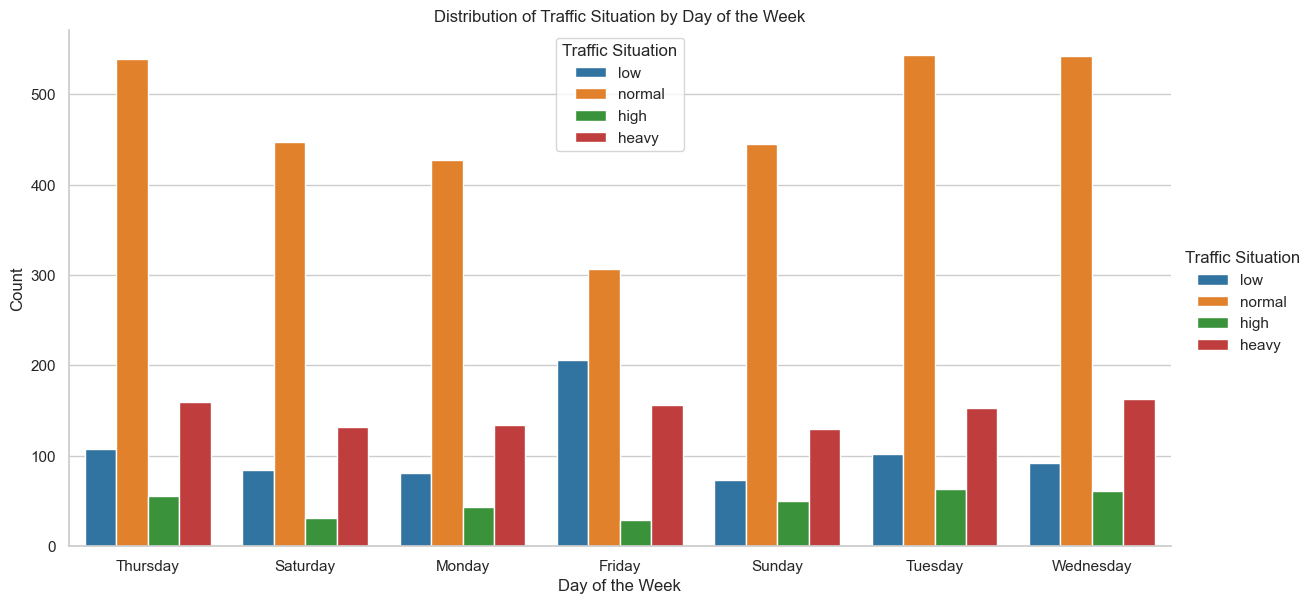

In [101]:
# # 查看不同日子的交通情况
# sns.catplot(
#     data=train,
#     x='Day of the week',        # X-axis represents the day of the week
#     hue='Traffic Situation',    # Color by traffic situation
#     kind='count',               # Use count plot to show the number of occurrences
#     palette='tab10',            # Select a color palette
#     height=6,                   # Set the height of the plot
#     aspect=2                    # Set the aspect ratio (width/height)
# )

# # Add title and labels to the plot
# plt.title('Distribution of Traffic Situation by Day of the Week')
# plt.xlabel('Day of the Week')
# plt.ylabel('Count')
# #plt.xticks(rotation=45)        # Rotate x-axis labels for better readability
# plt.legend(title='Traffic Situation')  # Add legend with title
# # 保存高清图片
# plt.savefig('Distribution of Traffic Situation by Day of the Week.png', dpi=300)
# plt.show()                    # Display the plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设 train 是一个 DataFrame
# 将 Traffic Situation 转换为有序分类变量
traffic_order = ['low', 'normal', 'high', 'heavy']
train['Traffic Situation'] = pd.Categorical(train['Traffic Situation'], categories=traffic_order, ordered=True)

# 查看不同日子的交通情况
sns.catplot(
    data=train,
    x='Day of the week',        # X-axis represents the day of the week
    hue='Traffic Situation',    # Color by traffic situation
    kind='count',               # Use count plot to show the number of occurrences
    palette='tab10',            # Select a color palette
    height=6,                   # Set the height of the plot
    aspect=2                    # Set the aspect ratio (width/height)
)

# Add title and labels to the plot
plt.title('Distribution of Traffic Situation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=0)        # Set rotation to 0 to avoid rotating x-axis labels
plt.legend(title='Traffic Situation')  # Add legend with title

# 保存高清图片
plt.savefig('Distribution of Traffic Situation by Day of the Week.png', dpi=300)

plt.show()                    # Display the plot

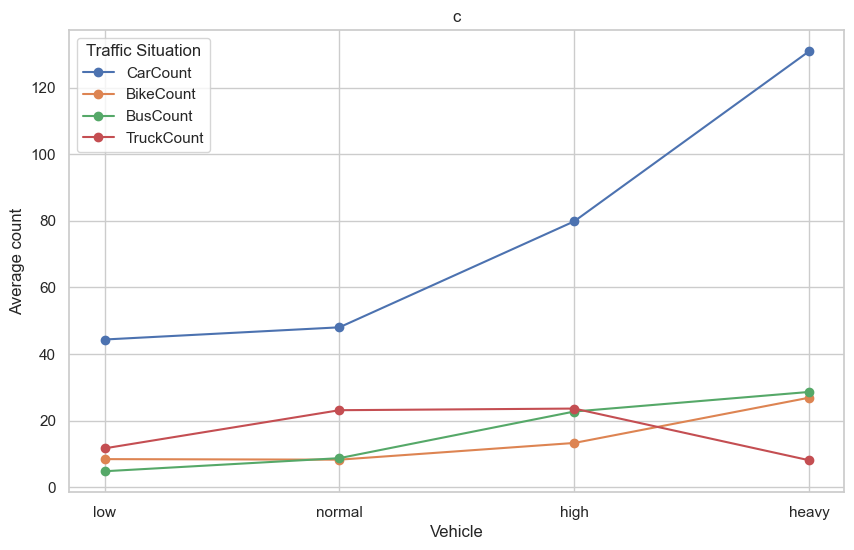

In [102]:
# #每种交通工具对交通总量对影响
# transportation_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
# traffic_situation_column = 'Traffic Situation'

# # 创建图形及轴
# plt.figure(figsize=(14, 10))

# # 用于存储图例的标签
# legend_labels = []

# # 绘制各交通工具的折线图
# for i, transp_col in enumerate(transportation_columns, 1):
#     plt.subplot(2, 2, i)
#     # 注意这里移除了 label 参数
#     sns.lineplot(
#         data=train,
#         y='Total',  # 使用 Total 作为 X 轴，表示交通总量
#         x=transp_col,  # 使用每种交通工具的数量作为 Y 轴
#         hue=traffic_situation_column,  # 分组依据为交通情况
#         marker='o',
#     )
#     # 将标签添加到 legend_labels 列表中
#     legend_labels.append(transp_col)
    
#     plt.title(f'{transp_col} vs Total Traffic')  # 标题
#     plt.xlabel('Number of Vehicles')  # X 轴标签
#     plt.ylabel('Total Traffic')  # Y 轴标签

# # 在最后一个子图上手动设置图例
# plt.legend(title='Transportation', labels=legend_labels)

# # 显示图表
# plt.tight_layout()
# plt.show()

traffic_order = ['low', 'normal', 'high', 'heavy']
train['Traffic Situation'] = pd.Categorical(train['Traffic Situation'], categories=traffic_order, ordered=True)

# 按 Traffic Situation 分组并计算每种交通工具的平均数量
grouped = train.groupby('Traffic Situation')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

# 转置 DataFrame 以使交通状况成为行
grouped_transposed = grouped.T

# 绘制折线图
plt.figure(figsize=(10, 6))
for index, row in grouped_transposed.iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# 添加标题和标签
plt.title('c')
plt.xlabel('Vehicle')
plt.ylabel('Average count')
plt.legend(title='Traffic Situation')
plt.grid(True)
# 保存高清图片
plt.savefig(f'The number of vehicles changes under different traffic conditions.png', dpi=300)
plt.show()

In [105]:
# transportation_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
# traffic_situation_column = 'Traffic Situation'

# # 用于存储图例的标签
# legend_labels = []

# # 设置图形和轴
# plt.figure(figsize=(14, 10))
# 设置图形背景为无色
sns.set(style="whitegrid")
# # 绘制各交通工具的折线图
# for i, transp_col in enumerate(transportation_columns, 1):
#     plt.figure(figsize=(8, 6), dpi=300)  # 设置每张图的大小和高清参数
#     sns.lineplot(
#         data=train,
#         y='Total',  # 使用 Total 作为 Y 轴，表示交通总量
#         x=transp_col,  # 使用每种交通工具的数量作为 X 轴
#         hue=traffic_situation_column,  # 分组依据为交通情况
#         marker='o',
#     )
    
#     plt.title(f'{transp_col} vs Total Traffic')  # 标题
#     plt.xlabel('Number of Vehicles')  # X 轴标签
#     plt.ylabel('Total Traffic')  # Y 轴标签
    
#     # 保存高清图片
#     plt.savefig(f'{transp_col}_vs_Total_Traffic.png', dpi=300)
    
#     plt.show()  # 显示图表

### 不同交通工具对交通工具对影响

In [108]:
#将数值编码化
df_temp=train
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
train=df_temp
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5920,4:00:00 PM,9,4,146,25,33,8,212,3
1080,6:00:00 AM,21,6,89,21,18,8,136,1
1256,2:00:00 AM,23,1,6,1,1,21,29,1
2337,8:15:00 AM,3,5,31,3,3,26,63,1
4046,3:30:00 AM,21,7,14,1,1,12,28,0
...,...,...,...,...,...,...,...,...,...
3341,7:15:00 PM,13,5,42,1,5,11,59,0
1835,2:45:00 AM,29,7,15,2,1,37,55,1
2216,2:00:00 AM,2,4,11,2,0,20,33,1
4093,3:15:00 PM,21,7,44,16,9,13,82,0


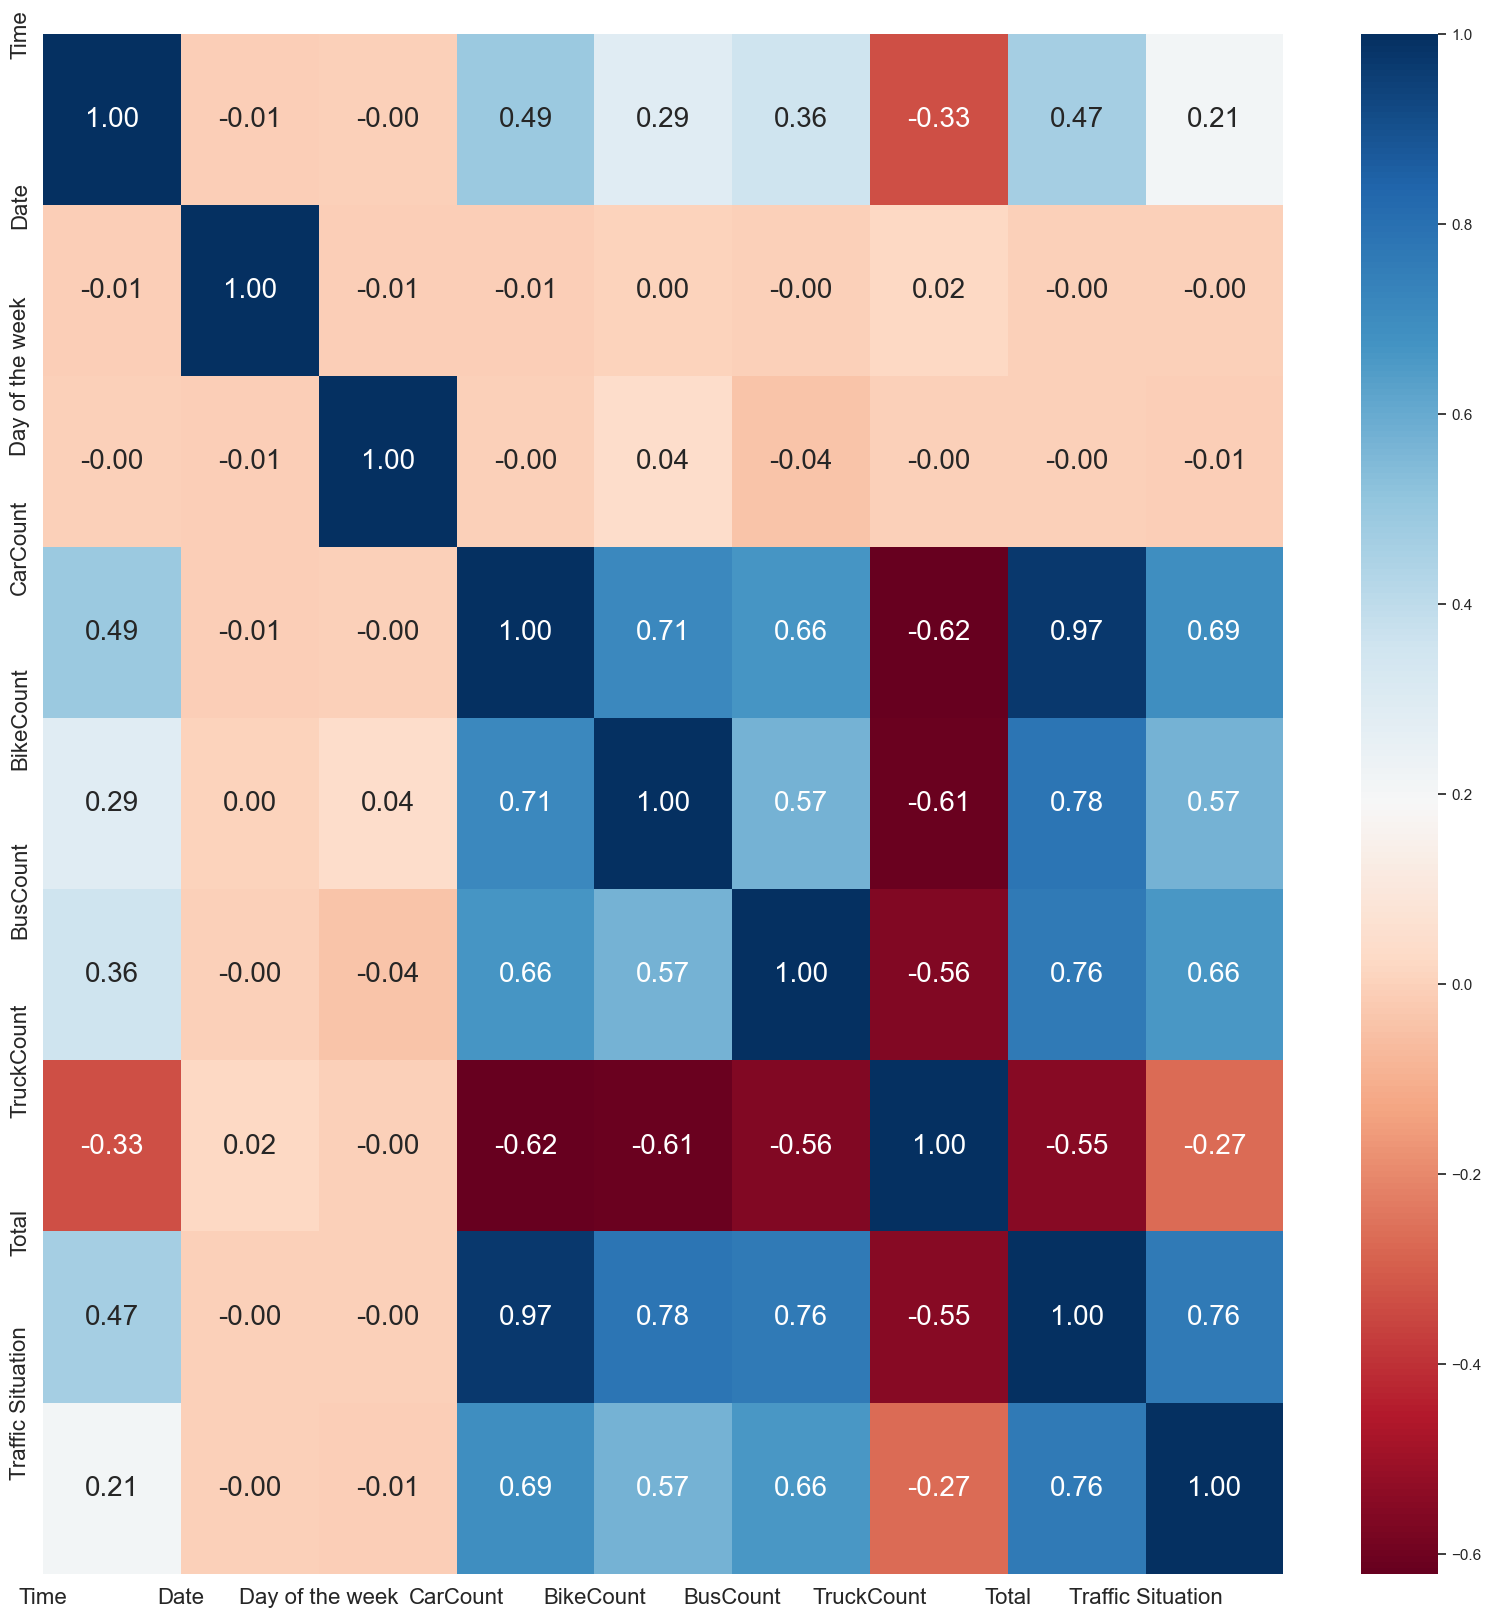

In [110]:
#相关性矩阵
train_temp=train

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_temp['Time'] = le.fit_transform(train_temp['Time'])

corr = train_temp.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f",annot_kws={"size": 20},ax=ax)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
# 调整 x 轴和 y 轴的标签字体大小
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
# # 保存高清图片
plt.savefig('all_pearson.png', dpi=500)
plt.show()


In [111]:
# 打印相关性矩阵
print(corr)

                       Time      Date  Day of the week  CarCount  BikeCount  \
Time               1.000000 -0.010323        -0.001618  0.492343   0.286815   
Date              -0.010323  1.000000        -0.011992 -0.011238   0.002570   
Day of the week   -0.001618 -0.011992         1.000000 -0.004334   0.040738   
CarCount           0.492343 -0.011238        -0.004334  1.000000   0.712364   
BikeCount          0.286815  0.002570         0.040738  0.712364   1.000000   
BusCount           0.355268 -0.001902        -0.040671  0.664964   0.574724   
TruckCount        -0.331575  0.020552        -0.002755 -0.620645  -0.608919   
Total              0.466347 -0.004824        -0.004621  0.971853   0.783995   
Traffic Situation  0.208895 -0.002989        -0.011406  0.690137   0.572445   

                   BusCount  TruckCount     Total  Traffic Situation  
Time               0.355268   -0.331575  0.466347           0.208895  
Date              -0.001902    0.020552 -0.004824          -0.00298

### 重要度排序(传统机器学习)

#### 不同气候对某一车量的相关性分析

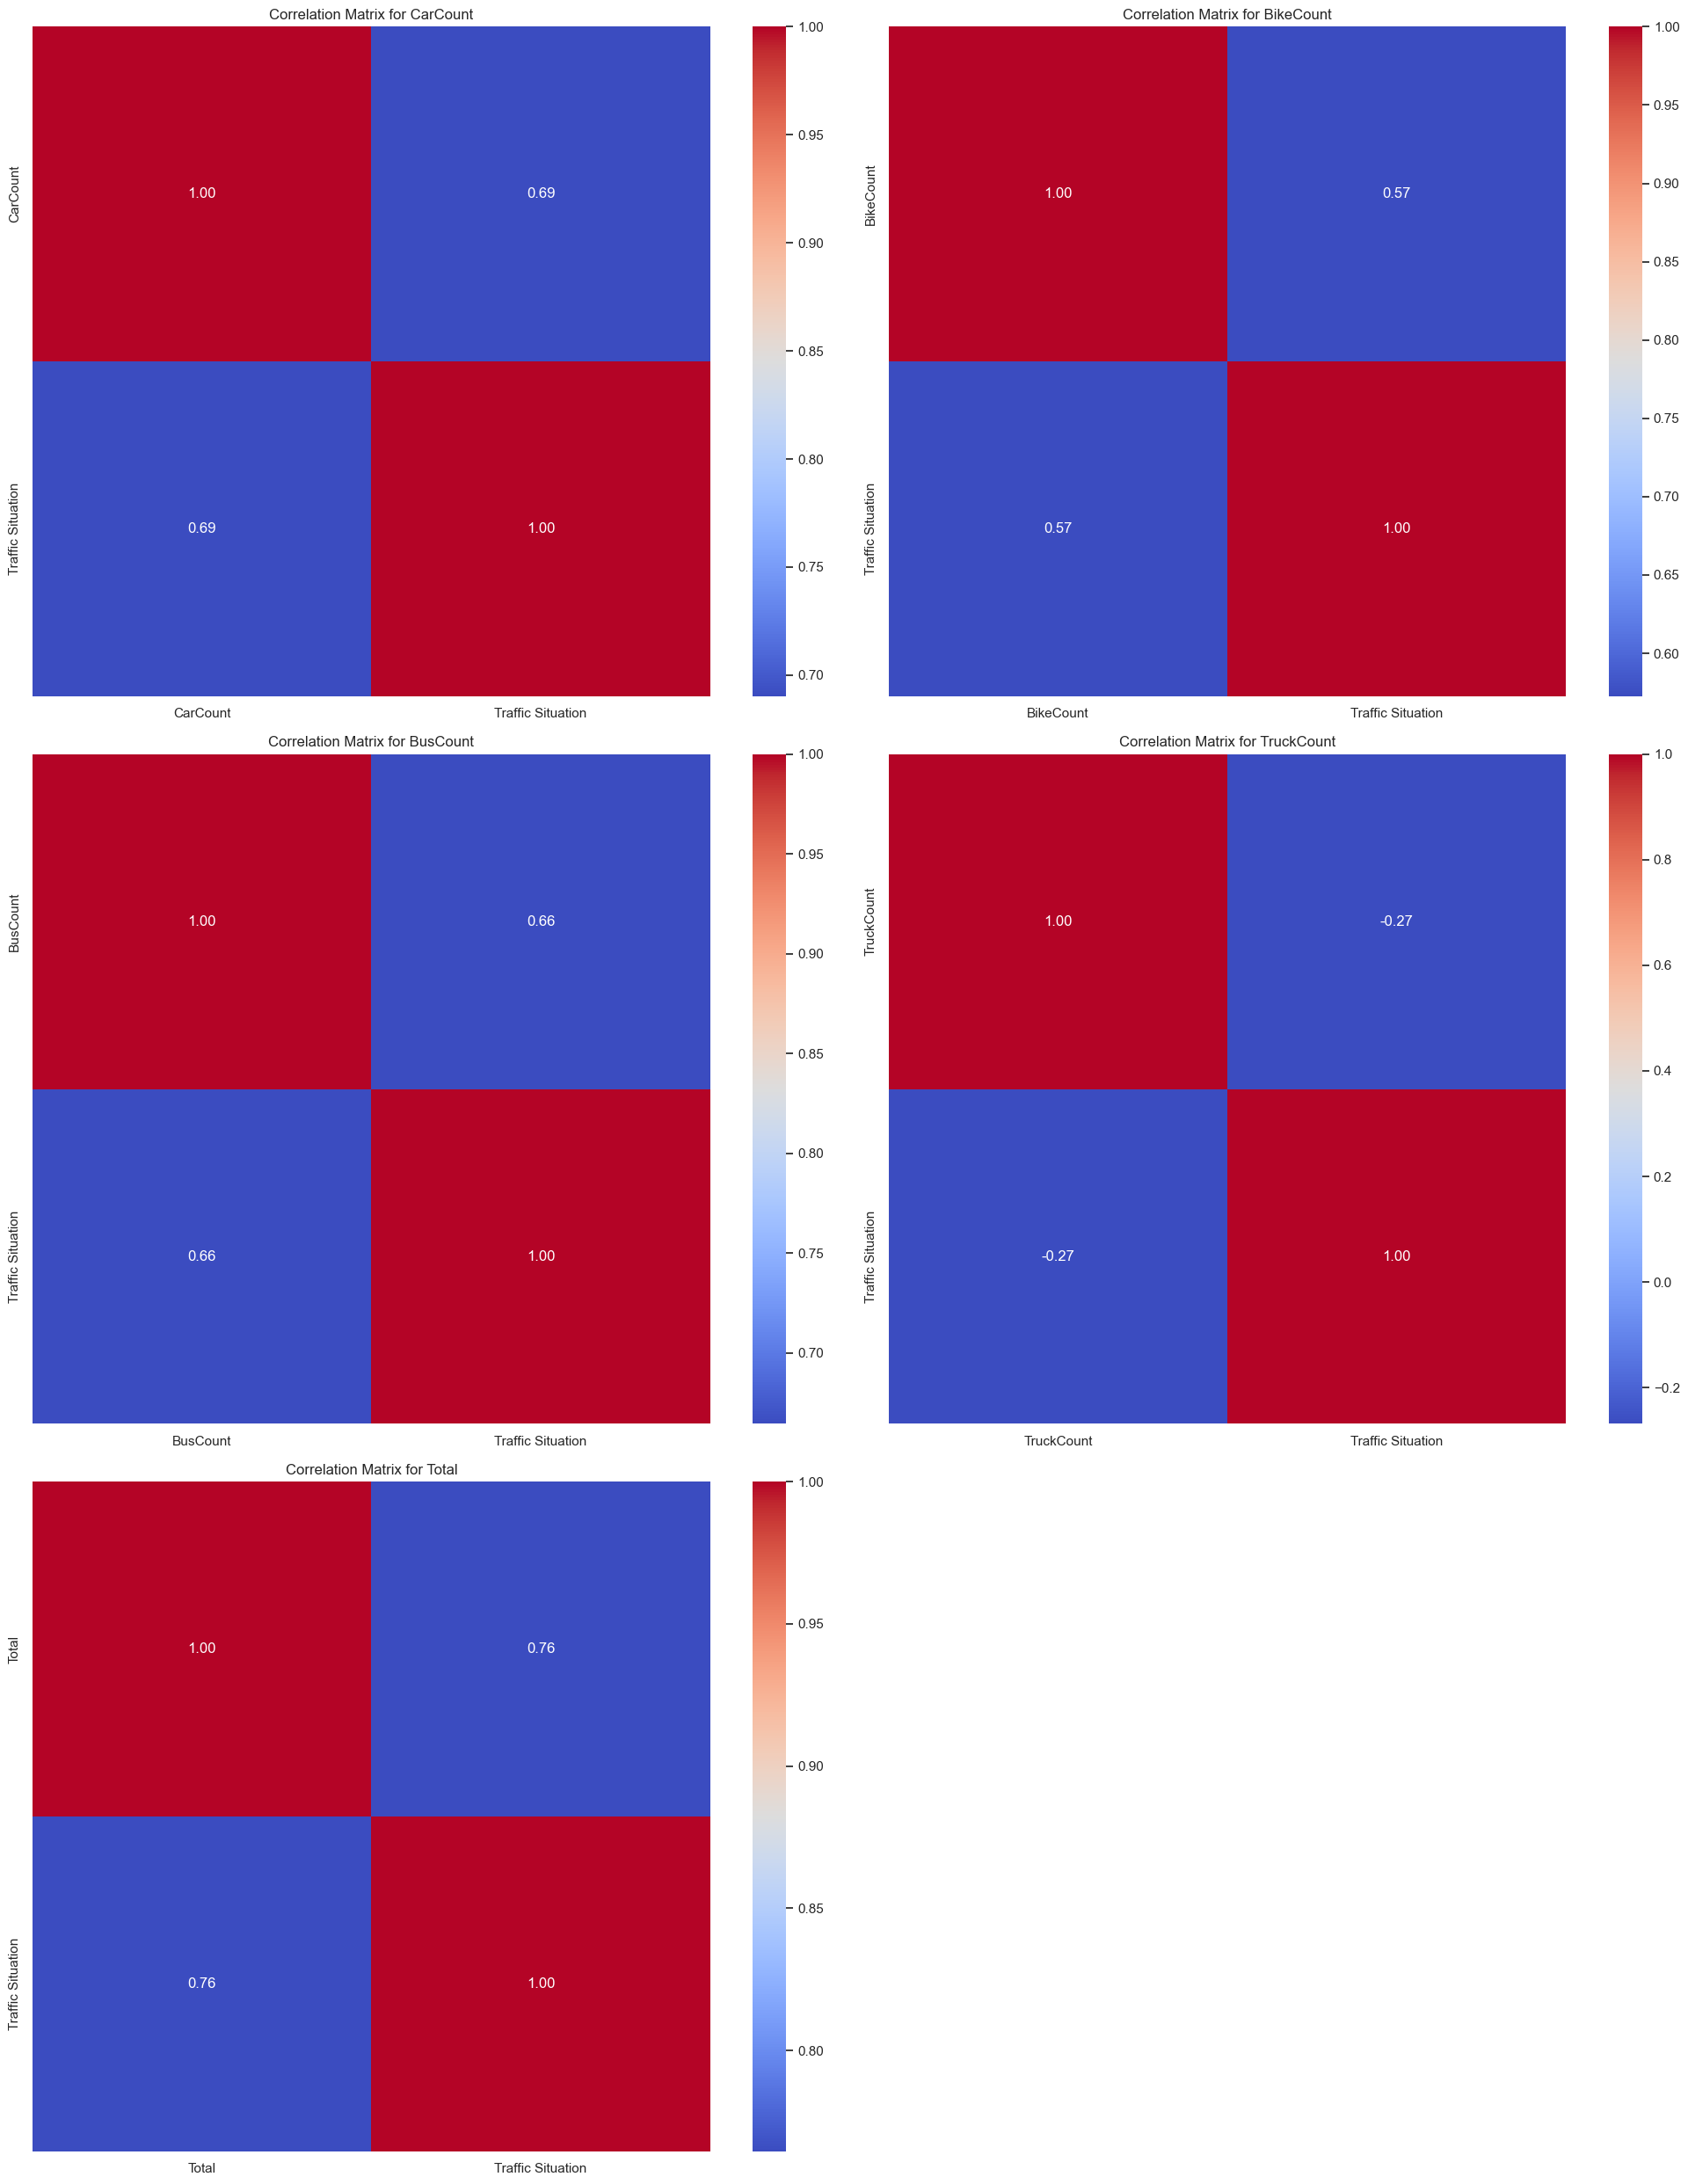

In [114]:
transportation_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
traffic_situation_column = 'Traffic Situation'

# 计算各交通工具与总交通量之间的相关性
correlation_matrices = {}
for col in transportation_columns:
    correlation_matrix = train[[col, 'Traffic Situation']].corr()
    correlation_matrices[col] = correlation_matrix

# 可视化相关性矩阵
plt.figure(figsize=(20, 25))

for i, (col, corr_matrix) in enumerate(correlation_matrices.items(), 1):
    plt.subplot(3, 2, i)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix for {col}')

plt.tight_layout()
plt.show()

In [115]:
# 打印相关性系数
for col in transportation_columns:
    # 打印相关性矩阵
    print(f"Correlation Matrix for {col}:")
    print(correlation_matrix)
    print("\n")

Correlation Matrix for CarCount:
                      Total  Traffic Situation
Total              1.000000           0.764566
Traffic Situation  0.764566           1.000000


Correlation Matrix for BikeCount:
                      Total  Traffic Situation
Total              1.000000           0.764566
Traffic Situation  0.764566           1.000000


Correlation Matrix for BusCount:
                      Total  Traffic Situation
Total              1.000000           0.764566
Traffic Situation  0.764566           1.000000


Correlation Matrix for TruckCount:
                      Total  Traffic Situation
Total              1.000000           0.764566
Traffic Situation  0.764566           1.000000


Correlation Matrix for Total:
                      Total  Traffic Situation
Total              1.000000           0.764566
Traffic Situation  0.764566           1.000000




#### 峰度与偏度分析

In [117]:
# Compute frequency counts
counts = np.bincount(y_train)

# Define labels for the plots
class_labels = ['1', '2', '3', '4']
labels = [class_labels[i] for i in range(len(counts))]

# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure and axis for the subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart
axs[0].pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel', len(labels))
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axs[0].set_title('Pie Chart of y_train')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Bar Plot
sns.barplot(x=labels, y=counts, palette='pastel', ax=axs[1])
axs[1].set_title('Bar Plot of y_train')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
# 保存高清图片
plt.savefig('Traffic Situation Distribution.png', dpi=500)
# Show the plots
plt.show()

print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

NameError: name 'y_train' is not defined

#### 重要度排序

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

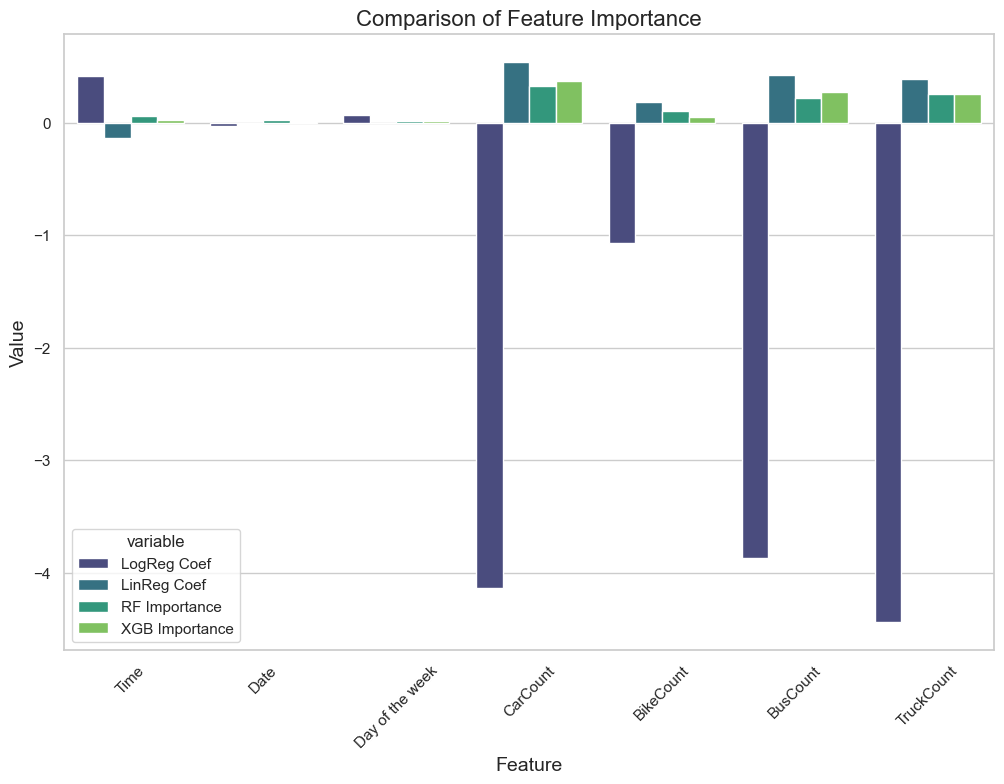

In [120]:
# 准备特征和目标变量
X = train.drop(columns=['Traffic Situation', 'Total'], axis=1)  # 从数据集中移除目标列 'Traffic Situation' 和 'Total' 列，得到特征数据
y = train['Traffic Situation']  # 提取目标列 'Traffic Situation'，得到目标数据

# 划分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 逻辑回归模型
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_reg_coef = pd.DataFrame({'Feature': X.columns, 'LogReg Coef': log_reg.coef_[0]})

# 线性回归模型（注意：线性回归通常用于回归问题，这里假设目标变量是连续的）
# 如果目标变量是分类的，线性回归可能不适合
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_coef = pd.DataFrame({'Feature': X.columns, 'LinReg Coef': lin_reg.coef_})

# 随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_importances = pd.DataFrame({'Feature': X.columns, 'RF Importance': rf_model.feature_importances_})

# XGBoost模型
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
xgb_importances = pd.DataFrame({'Feature': X.columns, 'XGB Importance': xgb_model.feature_importances_})

# 合并结果
feature_importance_comparison = log_reg_coef.merge(lin_reg_coef, on='Feature') \
    .merge(rf_importances, on='Feature') \
    .merge(xgb_importances, on='Feature')

# 设置图形风格
sns.set(style="whitegrid")

# 绘制特征重要度排序图
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='value', hue='variable', 
            data=pd.melt(feature_importance_comparison, id_vars=['Feature']), 
            palette='viridis')
plt.title('Comparison of Feature Importance', fontsize=16)  # 特征重要度比较
plt.xlabel('Feature', fontsize=14)  # 特征
plt.ylabel('Value', fontsize=14)  # 值
plt.xticks(rotation=45)
# 保存高清图片
plt.savefig('Feature Importance.png', dpi=300)
plt.show()

In [121]:
# 打印特征数值
print(feature_importance_comparison)

           Feature  LogReg Coef  LinReg Coef  RF Importance  XGB Importance
0             Time     0.412834    -0.141061       0.062603        0.022390
1             Date    -0.027711    -0.008494       0.022935        0.007843
2  Day of the week     0.063579    -0.002194       0.018404        0.014647
3         CarCount    -4.135495     0.539401       0.325846        0.373404
4        BikeCount    -1.069498     0.179606       0.099610        0.051953
5         BusCount    -3.871571     0.424426       0.219463        0.273055
6       TruckCount    -4.437865     0.385040       0.251138        0.256706


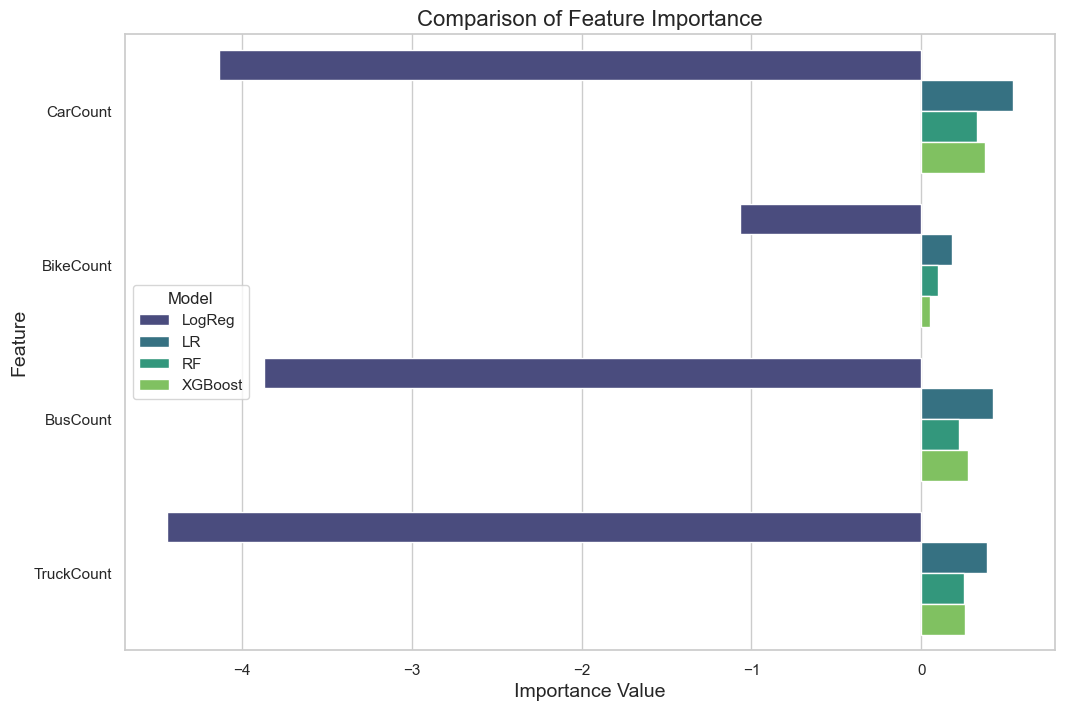

In [128]:
# # 创建特征重要性数据的 DataFrame
# feature_importance_data = pd.DataFrame({
#     'Feature': ['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount'],
#     'LogReg Coef': [0.412834, -0.027711, 0.063579, -4.135495, -1.069498, -3.871571, -4.437865],
#     'LinReg Coef': [-0.141061, -0.008494, -0.002194, 0.539401, 0.179606, 0.424426, 0.385040],
#     'RF Importance': [0.062603, 0.022935, 0.018404, 0.325846, 0.099610, 0.219463, 0.251138],
#     'XGB Importance': [0.022390, 0.007843, 0.014647, 0.373404, 0.051953, 0.273055, 0.256706]
# })

# # 设置图形风格
# sns.set(style="whitegrid")

# # 绘制特征重要度排序图
# plt.figure(figsize=(12, 8))
# melted_data = pd.melt(feature_importance_data, id_vars=['Feature'], value_vars=['LogReg Coef', 'LinReg Coef', 'RF Importance', 'XGB Importance'])
# sns.barplot(x='value', y='Feature', hue='variable', data=melted_data, palette='viridis')
# plt.title('Comparison of Feature Importance', fontsize=16)  # 特征重要度比较
# plt.xlabel('Importance Value', fontsize=14)  # 重要度值
# plt.ylabel('Feature', fontsize=14)  # 特征
# plt.legend(title='Model')
# # 保存高清图片
# plt.savefig('Feature Importance2.png', dpi=300)
# plt.show()
# 创建特征重要性数据的 DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建特征重要性数据的 DataFrame
feature_importance_data = pd.DataFrame({
    'Feature': ['CarCount', 'BikeCount', 'BusCount', 'TruckCount'],
    'LogReg': [-4.135495, -1.069498, -3.871571, -4.437865],
    'LR': [0.539401, 0.179606, 0.424426, 0.385040],
    'RF': [0.325846, 0.099610, 0.219463, 0.251138],
    'XGBoost': [0.373404, 0.051953, 0.273055, 0.256706]
})

# 设置图形风格
sns.set(style="whitegrid")

# 绘制特征重要度排序图
plt.figure(figsize=(12, 8))
melted_data = pd.melt(feature_importance_data, id_vars=['Feature'], value_vars=['LogReg', 'LR', 'RF', 'XGBoost'])
sns.barplot(x='value', y='Feature', hue='variable', data=melted_data, palette='viridis')
plt.title('Comparison of Feature Importance', fontsize=16)  # 特征重要度比较
plt.xlabel('Importance Value', fontsize=14)  # 重要度值
plt.ylabel('Feature', fontsize=14)  # 特征
plt.legend(title='Model')

# 保存高清图片
plt.savefig('Feature Importance.png', dpi=500)
plt.show()

## 预测

> 本试验将对数据集进行交叉验证

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [123]:
# 选择特征和目标变量
features = [ 'CarCount', 'BikeCount', 'BusCount', 'TruckCount','Total']
target = 'Traffic Situation'
# 分割数据集
X = train[features]
y = train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将标签转换为独热编码（用于神经网络模型）
num_classes = len(np.unique(y))  # 确定类别的数量
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [125]:
train_sizes = np.linspace(0.1, 0.9, 10)

#### 线性回归

In [132]:
# 存储不同训练集规模下的模型R²分数
r2_values_lr = []
mses_lr = []

lr_model = LinearRegression()

train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练线性回归模型
    lr_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算R²分数
    y_pred = lr_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_values_lr.append(r2)
    
    # 计算MSE
    y_pred_prob = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_prob)
    mses_lr.append(mse)

# 输出鲁棒性数值
for size, mse in zip(train_sizes, mses_lr):
    print(f'Training Set Size: {size}, Mean Squared Error(均方误差): {mse}')

# 预测测试集
y_pred = lr_model.predict(X_test)

# 计算测试集的R²分数
test_r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {test_r2:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.4f}")

Training Set Size: 0.1, Mean Squared Error(均方误差): 0.3094289444810111
Training Set Size: 0.2, Mean Squared Error(均方误差): 0.30797682596185255
Training Set Size: 0.3, Mean Squared Error(均方误差): 0.30691215390811105
Training Set Size: 0.4, Mean Squared Error(均方误差): 0.30685658357302714
Training Set Size: 0.5, Mean Squared Error(均方误差): 0.3068009865920597
Training Set Size: 0.6, Mean Squared Error(均方误差): 0.3062674845368495
Training Set Size: 0.7, Mean Squared Error(均方误差): 0.30596054055374294
Training Set Size: 0.8, Mean Squared Error(均方误差): 0.3063978413129782
Training Set Size: 0.9, Mean Squared Error(均方误差): 0.30563520381236825
Test R² Score: 0.6576
Test MSE: 0.3056


### XGBoost

In [135]:
from xgboost import XGBClassifier

In [137]:
# 存储不同训练集规模下的模型准确率和MSE
accuracies_xgb = []
mses_xgb = []

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练XGBoost模型
    xgb_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算准确率
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_xgb.append(accuracy)
    
    # 计算MSE
    y_pred_prob = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_prob)
    mses_xgb.append(mse)

# 输出鲁棒性数值
for size, accuracy, mse in zip(train_sizes, accuracies_xgb, mses_xgb):
    print(f'Training Set Size: {size}, Accuracy: {accuracy:.4f}, Mean Squared Error(均方误差): {mse:.4f}')

# 预测测试集
y_pred = xgb_model.predict(X_test)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.4f}")

Training Set Size: 0.1, Accuracy: 0.9751, Mean Squared Error(均方误差): 0.0305
Training Set Size: 0.2, Accuracy: 0.9944, Mean Squared Error(均方误差): 0.0112
Training Set Size: 0.3, Accuracy: 0.9950, Mean Squared Error(均方误差): 0.0180
Training Set Size: 0.4, Accuracy: 0.9969, Mean Squared Error(均方误差): 0.0106
Training Set Size: 0.5, Accuracy: 0.9975, Mean Squared Error(均方误差): 0.0081
Training Set Size: 0.6, Accuracy: 0.9981, Mean Squared Error(均方误差): 0.0075
Training Set Size: 0.7, Accuracy: 0.9981, Mean Squared Error(均方误差): 0.0075
Training Set Size: 0.8, Accuracy: 0.9981, Mean Squared Error(均方误差): 0.0075
Training Set Size: 0.9, Accuracy: 0.9994, Mean Squared Error(均方误差): 0.0025
Test Accuracy: 0.9994
Test MSE: 0.0025


#### 随机森林

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
accuracies_rf = []
mses_rf = []

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练随机森林模型
    rf_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算准确率
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_rf.append(accuracy)
    
    # 计算MSE
    y_pred_prob = rf_model.predict(X_test)  # 获取预测的概率
    mse = mean_squared_error(y_test, y_pred_prob)
    mses_rf.append(mse)

# 输出鲁棒性数值
for size, mse in zip(train_sizes, mses_rf):
    print(f'Training Set Size: {size}, Mean Squared Error(均方误差): {mse}')

# 预测测试集
y_pred = rf_model.predict(X_test)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred_prob)
print(f"Test MSE: {test_mse:.4f}")   

Training Set Size: 0.1, Mean Squared Error(均方误差): 0.031113876789047916
Training Set Size: 0.2, Mean Squared Error(均方误差): 0.019912881144990666
Training Set Size: 0.3, Mean Squared Error(均方误差): 0.009956440572495333
Training Set Size: 0.4, Mean Squared Error(均方误差): 0.010578718108276292
Training Set Size: 0.5, Mean Squared Error(均方误差): 0.008089607965152458
Training Set Size: 0.6, Mean Squared Error(均方误差): 0.008089607965152458
Training Set Size: 0.7, Mean Squared Error(均方误差): 0.008089607965152458
Training Set Size: 0.8, Mean Squared Error(均方误差): 0.0074673304293715
Training Set Size: 0.9, Mean Squared Error(均方误差): 0.008089607965152458
Test Accuracy: 0.9975
Test MSE: 0.0081


#### 罗辑回归

In [145]:
from sklearn.linear_model import LogisticRegression

In [147]:
# 定义训练集大小的范围
train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_lr = []
mses_lr = []

lr_model = LogisticRegression(max_iter=1000, random_state=42)

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练逻辑回归模型
    lr_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算准确率
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_lr.append(accuracy)
    
    # 计算MSE
    y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # 获取预测的概率
    mse = mean_squared_error(y_test, y_pred_prob)
    mses_lr.append(mse)

# 输出鲁棒性数值
for size, mse in zip(train_sizes, mses_lr):
    print(f'Training Set Size: {size}, Mean Squared Error(均方误差): {mse}')

# 预测测试集
y_pred = lr_model.predict(X_test)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred_prob)
print(f"Test MSE: {test_mse:.4f}")

Training Set Size: 0.1, Mean Squared Error(均方误差): 1.9271313875825065
Training Set Size: 0.2, Mean Squared Error(均方误差): 1.9342200356065327
Training Set Size: 0.30000000000000004, Mean Squared Error(均方误差): 1.9383419886156705
Training Set Size: 0.4, Mean Squared Error(均方误差): 1.9478525003682048
Training Set Size: 0.5, Mean Squared Error(均方误差): 1.9485829387660554
Training Set Size: 0.6, Mean Squared Error(均方误差): 1.959056295065216
Training Set Size: 0.7000000000000001, Mean Squared Error(均方误差): 1.9614886544401056
Training Set Size: 0.8, Mean Squared Error(均方误差): 1.970672163141253
Training Set Size: 0.9, Mean Squared Error(均方误差): 1.9677023263716409
Test Accuracy: 0.8843
Test MSE: 1.9677


# 综合分析

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [81]:
train = pd.read_csv('TrafficTwoMonth.csv')
#将数值编码化
df_temp=train
df_temp['Day of the week'] = df_temp['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})
df_temp['Traffic Situation'] = df_temp['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
train=df_temp
train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,2,13,2,2,24,41,1
1,12:15:00 AM,10,2,14,1,1,36,52,1
2,12:30:00 AM,10,2,10,2,2,32,46,1
3,12:45:00 AM,10,2,10,2,2,36,50,1
4,1:00:00 AM,10,2,11,2,1,34,48,1
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,4,16,3,1,36,56,1
5948,11:00:00 PM,9,4,11,0,1,30,42,1
5949,11:15:00 PM,9,4,15,4,1,25,45,1
5950,11:30:00 PM,9,4,16,5,0,27,48,1


In [84]:
# 选择特征和目标变量
features = [ 'CarCount', 'BikeCount', 'BusCount', 'TruckCount','Total']
target = 'Traffic Situation'
# 分割数据集
X = train[features]
y = train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 将标签转换为独热编码（用于神经网络模型）
num_classes = len(np.unique(y))  # 确定类别的数量
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

train_sizes = np.linspace(0.1, 0.9, 10)

#### 线性回归

In [98]:
# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 存储不同训练集规模下的模型R²分数
r2_values_lr = []
mses_lr = []

lr_model = LinearRegression()

train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练线性回归模型
    lr_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算R²分数
    y_pred = lr_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_values_lr.append(r2)
    
    # 计算MSE
    y_pred_prob = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_prob)
    mses_lr.append(mse)

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练线性回归模型
    lr_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算训练集的 R² 分数和 MSE
    y_train_pred = lr_model.predict(X_train_subset)
    train_r2 = r2_score(y_train_subset, y_train_pred)
    train_mse = mean_squared_error(y_train_subset, y_train_pred)
    
    # 预测并计算测试集的 R² 分数和 MSE
    y_pred = lr_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    
    # 存储测试集的 R² 分数和 MSE
    r2_values_lr.append(test_r2)
    mses_lr.append(test_mse)
    
    # 输出训练集和测试集的性能指标
    print(f'Training Set Size: {size}')
    print(f'Training Set R² Score: {train_r2:.4f}, Training Set MSE: {train_mse:.4f}')
    print(f'Test Set R² Score: {test_r2:.4f}, Test Set MSE: {test_mse:.4f}')
    print()
# 预测测试集
y_pred = lr_model.predict(X_test)

# 计算测试集的R²分数
test_r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {test_r2:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.4f}")

Training Set Size: 0.1
Training Set R² Score: 0.6455, Training Set MSE: 0.3363
Test Set R² Score: 0.6459, Test Set MSE: 0.2951

Training Set Size: 0.2
Training Set R² Score: 0.6641, Training Set MSE: 0.3167
Test Set R² Score: 0.6475, Test Set MSE: 0.2937

Training Set Size: 0.3
Training Set R² Score: 0.6645, Training Set MSE: 0.3139
Test Set R² Score: 0.6493, Test Set MSE: 0.2923

Training Set Size: 0.4
Training Set R² Score: 0.6607, Training Set MSE: 0.3178
Test Set R² Score: 0.6375, Test Set MSE: 0.3021

Training Set Size: 0.5
Training Set R² Score: 0.6678, Training Set MSE: 0.3070
Test Set R² Score: 0.6502, Test Set MSE: 0.2915

Training Set Size: 0.6
Training Set R² Score: 0.6583, Training Set MSE: 0.3122
Test Set R² Score: 0.6484, Test Set MSE: 0.2931

Training Set Size: 0.7
Training Set R² Score: 0.6578, Training Set MSE: 0.3096
Test Set R² Score: 0.6498, Test Set MSE: 0.2919

Training Set Size: 0.8
Training Set R² Score: 0.6531, Training Set MSE: 0.3112
Test Set R² Score: 0.6502

In [92]:
y_pred = lr_model.predict(X_test)
# 计算测试集的 R² 分数
test_r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {test_r2:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.4f}")

# 计算并打印训练集的 MSE
y_train_pred = lr_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training Set MSE: {train_mse:.4f}")

Test R² Score: 0.6501
Test MSE: 0.2916
Training Set MSE: 0.3144


#### XGBoost

In [122]:
from xgboost import XGBClassifier
# 分割数据集
X = train[features]
y = train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 存储不同训练集规模下的模型准确率和MSE
accuracies_xgb = []
mses_xgb = []

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练XGBoost模型
    xgb_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算准确率
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_xgb.append(accuracy)
    
    # 计算MSE
    y_pred_prob = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_prob)
    mses_xgb.append(mse)

# 输出鲁棒性数值
for size, accuracy, mse in zip(train_sizes, accuracies_xgb, mses_xgb):
    print(f'Training Set Size: {size}, Accuracy: {accuracy:.4f}, Mean Squared Error(均方误差): {mse:.4f}')

# 预测测试集
y_pred = xgb_model.predict(X_test)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.4f}")

Training Set Size: 0.1, Accuracy: 0.9899, Mean Squared Error(均方误差): 0.0134
Training Set Size: 0.2, Accuracy: 0.9961, Mean Squared Error(均方误差): 0.0073
Training Set Size: 0.3, Accuracy: 0.9961, Mean Squared Error(均方误差): 0.0073
Training Set Size: 0.4, Accuracy: 0.9972, Mean Squared Error(均方误差): 0.0062
Training Set Size: 0.5, Accuracy: 0.9972, Mean Squared Error(均方误差): 0.0062
Training Set Size: 0.6, Accuracy: 0.9972, Mean Squared Error(均方误差): 0.0045
Training Set Size: 0.7, Accuracy: 0.9983, Mean Squared Error(均方误差): 0.0034
Training Set Size: 0.8, Accuracy: 0.9989, Mean Squared Error(均方误差): 0.0011
Training Set Size: 0.9, Accuracy: 0.9989, Mean Squared Error(均方误差): 0.0011
Test Accuracy: 0.9989
Test MSE: 0.0011


#### 随机森林

In [143]:
from sklearn.ensemble import RandomForestClassifier

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义训练集大小的范围
train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_rf = []
mses_rf = []

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练随机森林模型
    rf_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算准确率
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_rf.append(accuracy)
    
    # 计算MSE
    y_pred_prob = rf_model.predict(X_test)  # 获取预测的概率
    mse = mean_squared_error(y_test, y_pred_prob)
    mses_rf.append(mse)

# 输出鲁棒性数值
for size, mse in zip(train_sizes, mses_rf):
    print(f'Training Set Size: {size}, Mean Squared Error(均方误差): {mse}')

# 预测测试集
y_pred = rf_model.predict(X_test)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred_prob)
print(f"Test MSE: {test_mse:.4f}")    

Training Set Size: 0.1, Mean Squared Error(均方误差): 0.024076147816349383
Training Set Size: 0.2, Mean Squared Error(均方误差): 0.0167973124300112
Training Set Size: 0.30000000000000004, Mean Squared Error(均方误差): 0.015117581187010079
Training Set Size: 0.4, Mean Squared Error(均方误差): 0.006718924972004479
Training Set Size: 0.5, Mean Squared Error(均方误差): 0.005599104143337066
Training Set Size: 0.6, Mean Squared Error(均方误差): 0.006159014557670772
Training Set Size: 0.7000000000000001, Mean Squared Error(均方误差): 0.005599104143337066
Training Set Size: 0.8, Mean Squared Error(均方误差): 0.0033594624860022394
Training Set Size: 0.9, Mean Squared Error(均方误差): 0.006159014557670772
Test Accuracy: 0.9972
Test MSE: 0.0062


#### 罗辑回归

In [148]:
from sklearn.linear_model import LogisticRegression
# 分割数据集
X = train[features]
y = train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义训练集大小的范围
train_sizes = np.linspace(0.1, 0.9, 9)
accuracies_lr = []
mses_lr = []

lr_model = LogisticRegression(max_iter=1000, random_state=42)

for size in train_sizes:
    # 按比例缩减训练集
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # 训练逻辑回归模型
    lr_model.fit(X_train_subset, y_train_subset)
    
    # 预测并计算准确率
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_lr.append(accuracy)
    
    # 计算MSE
    y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # 获取预测的概率
    mse = mean_squared_error(y_test, y_pred_prob)
    mses_lr.append(mse)

# 输出鲁棒性数值
for size, mse ,ac in zip(train_sizes, mses_lr,accuracies_lr):
    print(f'Training Set Size: {size}, Mean Squared Error(均方误差): {mse}')
    print(f'Training Set Size: {size}, accuracies: {ac}')


# 预测测试集
y_pred = lr_model.predict(X_test)

# 计算测试集的准确率
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 计算测试集的均方误差
test_mse = mean_squared_error(y_test, y_pred_prob)
print(f"Test MSE: {test_mse:.4f}")

Training Set Size: 0.1, Mean Squared Error(均方误差): 1.8036256175529897
Training Set Size: 0.1, accuracies: 0.879619260918253
Training Set Size: 0.2, Mean Squared Error(均方误差): 1.8461399182659821
Training Set Size: 0.2, accuracies: 0.8852183650615901
Training Set Size: 0.30000000000000004, Mean Squared Error(均方误差): 1.8580177903693254
Training Set Size: 0.30000000000000004, accuracies: 0.8863381858902576
Training Set Size: 0.4, Mean Squared Error(均方误差): 1.8744561324127205
Training Set Size: 0.4, accuracies: 0.8846584546472565
Training Set Size: 0.5, Mean Squared Error(均方误差): 1.879424241356545
Training Set Size: 0.5, accuracies: 0.8868980963045913
Training Set Size: 0.6, Mean Squared Error(均方误差): 1.8717825486586634
Training Set Size: 0.6, accuracies: 0.8863381858902576
Training Set Size: 0.7000000000000001, Mean Squared Error(均方误差): 1.876955433718981
Training Set Size: 0.7000000000000001, accuracies: 0.8902575587905935
Training Set Size: 0.8, Mean Squared Error(均方误差): 1.8763444111204695
Trai

In [131]:
# 将结果转换为 DataFrame
robustness_results = pd.DataFrame({
    # 'Train Size': train_sizes,
    # 'BP Neural Network Accuracy': accuracies_bp,
    # 'RNN Accuracy': accuracies_rnn,
    # 'LSTM Accuracy': accuracies_lstm,
    'Random Forest Accuracy': accuracies_rf,
    'XGBoost Accuracy': accuracies_xgb,
    'Linear Regression R² Score': r2_values_lr,
    'Logistic Regression Accuracy': accuracies_lr
})

# 输出鲁棒性结果
print(robustness_results)

# 绘制鲁棒性图
plt.figure(figsize=(14, 8))
# plt.plot(train_sizes, accuracies_bp, marker='o', linestyle='-', color='r', label='BP Neural Network Accuracy')
# plt.plot(train_sizes, accuracies_rnn, marker='o', linestyle='-', color='g', label='RNN Accuracy')
# plt.plot(train_sizes, accuracies_lstm, marker='o', linestyle='-', color='m', label='LSTM Accuracy')
plt.plot(train_sizes, accuracies_rf, marker='o', linestyle='-', color='b', label='Random Forest Accuracy')
plt.plot(train_sizes, accuracies_xgb, marker='o', linestyle='-', color='c', label='XGBoost Accuracy')
plt.plot(train_sizes, r2_values_lr, marker='o', linestyle='-', color='y', label='Linear Regression R² Score')
plt.plot(train_sizes, accuracies_lr, marker='o', linestyle='-', color='k', label='Logistic Regression Accuracy')

plt.title('Model Robustness vs. Training Set Size', fontsize=16)
plt.xlabel('Training Set Size', fontsize=14)
#plt.ylabel('Accuracy / R² Score', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

ValueError: All arrays must be of the same length

In [50]:
# 输出鲁棒性数值
for size, rf_acc, xgb_acc, lr_r2, lr_acc in zip(train_sizes, accuracies_rf, accuracies_xgb, r2_values_lr, accuracies_lr):
    print(f'Training Set Size: {size}, Random Forest Accuracy: {rf_acc:.4f}, XGBoost Accuracy: {xgb_acc:.4f}, Linear Regression R² Score: {lr_r2:.4f}, Logistic Regression Accuracy: {lr_acc:.4f}')

Training Set Size: 0.1, Random Forest Accuracy: 0.9793, XGBoost Accuracy: 0.9899, Linear Regression R² Score: 0.6459, Logistic Regression Accuracy: 0.8796
Training Set Size: 0.2, Random Forest Accuracy: 0.9866, XGBoost Accuracy: 0.9961, Linear Regression R² Score: 0.6475, Logistic Regression Accuracy: 0.8852
Training Set Size: 0.30000000000000004, Random Forest Accuracy: 0.9882, XGBoost Accuracy: 0.9961, Linear Regression R² Score: 0.6493, Logistic Regression Accuracy: 0.8863
Training Set Size: 0.4, Random Forest Accuracy: 0.9966, XGBoost Accuracy: 0.9972, Linear Regression R² Score: 0.6398, Logistic Regression Accuracy: 0.8847
Training Set Size: 0.5, Random Forest Accuracy: 0.9978, XGBoost Accuracy: 0.9972, Linear Regression R² Score: 0.6495, Logistic Regression Accuracy: 0.8869
Training Set Size: 0.6, Random Forest Accuracy: 0.9972, XGBoost Accuracy: 0.9972, Linear Regression R² Score: 0.6483, Logistic Regression Accuracy: 0.8863
Training Set Size: 0.7000000000000001, Random Forest A